# What effect duration on bike
## by Hamid Alhiajily

## Investigation Overview

> I tested duration with multiple factors to know when duration increase or decrease

## Dataset Overview

> This dataset gathered from people who used Ford GoBike in San Francisco 2017.it contains 453159 rides with 15 feature there are nine numeric columns and two categorical columns


In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import requests
import zipfile
import datetime
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
df.member_birth_year=df.member_birth_year.apply(lambda x : 2017-x);

In [4]:
df.rename(columns={'member_birth_year':'member_age'},inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Bike Duration

> the plot distribution of duration is almost Normal strangely there is jump and under 100 seconds maybe because people want just to try the bike.

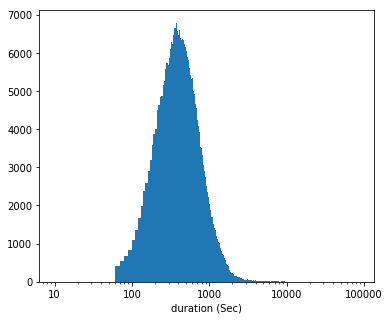

In [5]:
bins = np.arange(0, df['duration_sec'].max(),10)
plt.figure(figsize=[6, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 1e4, 1e5], [10, 100, 1000, 10000, 100000])
plt.xlabel('duration (Sec)')
plt.show()

## Duration vs User type

> the average duration for a customer is 1800 seconds and 750 seconds for a subscriber. I was confused because I thought the subscriber duration would be higher but it is the opposite. So, I went to their website to investigate more, and I found that the price for a single ride is 2 Dollar for a customer for 30 minutes, then it charges you 3 dollar for every 15 minutes. 30 minute is 1800 seconds so the customer wants to use every penny he paid. On the other hand, a subscriber pays 15 dollars per month and can use the bike for free for 45 minutes, after that he is charged 3$ for each 15 minutes. So a subscriber-only uses it to reach the destination.

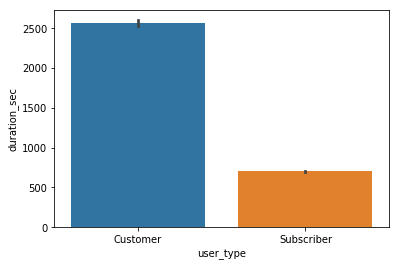

In [8]:
sns.barplot(data=df,x='user_type',y='duration_sec')

## How season affect the duration
the average duration in summer jumped because San Francisco is a tourist city that why it has jumped from June to August while the subscriber is a worker who stays in San Francisco al the time and it effect for them to subscribe


In [9]:
df['start_time']=pd.to_datetime(df['start_time'])

In [11]:
df['start_time'][0].month
df['month']=df['start_time'].apply(lambda x :x.month)

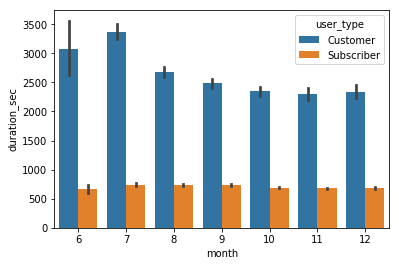

In [12]:
sns.barplot(data=df,x='month',y='duration_sec',hue='user_type')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!